# 1 Load Libraries

In [2]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pylab as plt
import seaborn as sns

# 2 Load Datasets after missing values

In [3]:
train = pd.read_csv('data/train_after_missing_value.csv')
test = pd.read_csv('data/test_after_missing_value.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.DataFrame(train)

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,M1,M2,M3,M4,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_14,id_17,id_19,id_20,id_30,id_31,id_32,id_33,DeviceInfo,id_12,id_15,id_16,id_28,id_29,id_34,id_35,id_36,id_37,id_38,DeviceType
0,0,2987000.0,0.0,86400.0,68.500000,13926.0,363.33368,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,103.0,13.0,23.0,9.0,13.00000,13.0,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,0.0000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,1.000000,1.00000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,117.00,0.00,0.0,0.0000,0.0,0.0,117.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,117.00,0.00,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,117.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001.0,0.0,86401.0,29.000000,2755.0,404.00000,150.0,102.0,325.0,87.0,8.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,103.0,8.0,0.0,9.0,0.00000,69.0,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.00000,1.000000,0.0000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
pd.DataFrame(test)

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,M1,M2,M3,M4,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_14,id_17,id_19,id_20,id_30,id_31,id_32,id_33,DeviceInfo,id_12,id_15,id_16,id_28,id_29,id_34,id_35,id_36,id_37,id_38,DeviceType
0,0,3663549.0,0.0,18403224.0,31.950,10409.0,111.0,150.0,226.0,170.0000,87.00000,1.0,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,418.0,203.0,409.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,47.95,0.00,0.00,47.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,47.9500,0.00,0.00,47.9500,0.00,0.00,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3663550.0,0.0,18403264.0,49.000,4272.0,111.0,150.0,226.0,299.0000,87.00000,4.0,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,231.0,634.0,634.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,280.00,77.00,0.00,280.00,77.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,280.0000,77.00,0.00,280.0000,0.00,77.00,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3663551.0,0.0,18403310.0,171.000,4476.0,574.0,150.0,226.0,472.0000,87.00000,2635.0,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,136.0,136.0,97.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0

# 3 Binning


3.1 Example of binning a couple of features

In [6]:
train['TransactionDT'].describe()

count    5.532870e+05
mean     7.505726e+06
std      4.605176e+06
min      8.640000e+04
25%      3.173272e+06
50%      7.437624e+06
75%      1.140605e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [7]:
mn = train['TransactionDT'].describe()['min']
mx = train['TransactionDT'].describe()['max']
print('min =', mn, '\nmax =', mx)

min = 86400.0 
max = 15811131.0


In [8]:
pd.cut(train['TransactionDT'], bins = 10)

0           (70675.269, 1658873.1]
1           (70675.269, 1658873.1]
2           (70675.269, 1658873.1]
3           (70675.269, 1658873.1]
4           (70675.269, 1658873.1]
                    ...           
553282    (14238657.9, 15811131.0]
553283    (14238657.9, 15811131.0]
553284    (14238657.9, 15811131.0]
553285    (14238657.9, 15811131.0]
553286    (14238657.9, 15811131.0]
Name: TransactionDT, Length: 553287, dtype: category
Categories (10, interval[float64, right]): [(70675.269, 1658873.1] < (1658873.1, 3231346.2] < (3231346.2, 4803819.3] < (4803819.3, 6376292.4] ... (9521238.6, 11093711.7] < (11093711.7, 12666184.8] < (12666184.8, 14238657.9] < (14238657.9, 15811131.0]]

In [9]:
pd.cut(train['TransactionDT'], bins = 10).value_counts()

TransactionDT
(1658873.1, 3231346.2]      74938
(70675.269, 1658873.1]      65945
(7948765.5, 9521238.6]      58487
(9521238.6, 11093711.7]     56559
(12666184.8, 14238657.9]    53169
(6376292.4, 7948765.5]      52687
(4803819.3, 6376292.4]      52326
(14238657.9, 15811131.0]    49956
(3231346.2, 4803819.3]      47740
(11093711.7, 12666184.8]    41480
Name: count, dtype: int64

(array([65945., 74938., 47740., 52326., 52687., 58487., 56559., 41480.,
        53169., 49956.]),
 array([   86400. ,  1658873.1,  3231346.2,  4803819.3,  6376292.4,
         7948765.5,  9521238.6, 11093711.7, 12666184.8, 14238657.9,
        15811131. ]),
 <BarContainer object of 10 artists>)

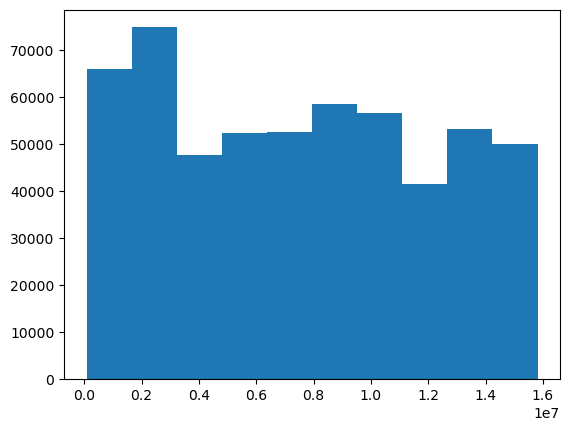

In [10]:
plt.hist(train['TransactionDT'], bins=10)

In [11]:
pd.cut(train['dist1'], bins = 10)

0         (-10.288, 1028.8]
1         (-10.288, 1028.8]
2         (-10.288, 1028.8]
3         (-10.288, 1028.8]
4         (-10.288, 1028.8]
                ...        
553282    (-10.288, 1028.8]
553283    (-10.288, 1028.8]
553284    (-10.288, 1028.8]
553285    (-10.288, 1028.8]
553286    (-10.288, 1028.8]
Name: dist1, Length: 553287, dtype: category
Categories (10, interval[float64, right]): [(-10.288, 1028.8] < (1028.8, 2057.6] < (2057.6, 3086.4] < (3086.4, 4115.2] ... (6172.8, 7201.6] < (7201.6, 8230.4] < (8230.4, 9259.2] < (9259.2, 10288.0]]

In [12]:
pd.cut(train['dist1'], bins = 10).value_counts()

dist1
(-10.288, 1028.8]    544936
(1028.8, 2057.6]       6102
(2057.6, 3086.4]       1993
(3086.4, 4115.2]        124
(4115.2, 5144.0]        120
(6172.8, 7201.6]          8
(7201.6, 8230.4]          2
(5144.0, 6172.8]          1
(9259.2, 10288.0]         1
(8230.4, 9259.2]          0
Name: count, dtype: int64

(array([5.44936e+05, 6.10200e+03, 1.99300e+03, 1.24000e+02, 1.20000e+02,
        1.00000e+00, 8.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  1028.8,  2057.6,  3086.4,  4115.2,  5144. ,  6172.8,
         7201.6,  8230.4,  9259.2, 10288. ]),
 <BarContainer object of 10 artists>)

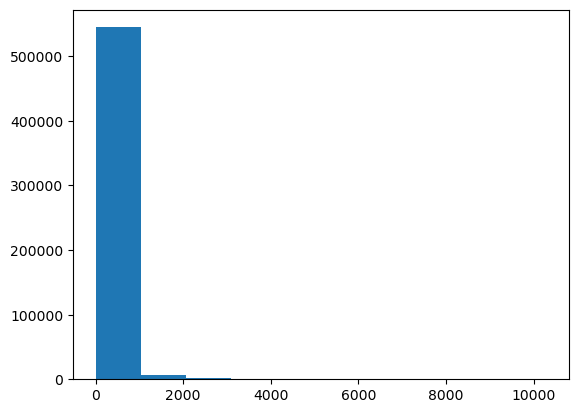

In [13]:
plt.hist(train['dist1'], bins=10)

3.2 Bin numerical Features

In [14]:
#identify the selected features only
numerical = ['TransactionDT', 'TransactionAmt', 'dist1']
C = range(1,15)
D = range(1, 16)
V = range(1, 340)
ID = range(1,12)
for i in C:
    s = 'C'+str(i)
    if s in train and s in test:
        numerical.append(s)
for i in D:
    s = 'D'+str(i)
    if s in train and s in test:
        numerical.append(s)
for i in V:
    s = 'V'+str(i)
    if s in train and s in test:
        numerical.append(s)
for i in ID:
    if i < 10:
        s = 'id_0' + str(i)
    else:
        s = 'id_' + str(i)
    if s in train and s in test:
        numerical.append(s)
print(numerical)

['TransactionDT', 'TransactionAmt', 'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V1

In [15]:
for attr in numerical:
    train[attr] = pd.cut(train[attr], bins = 10)
    test[attr] = pd.cut(test[attr], bins = 10)

In [16]:
pd.DataFrame(train)

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,M1,M2,M3,M4,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_14,id_17,id_19,id_20,id_30,id_31,id_32,id_33,DeviceInfo,id_12,id_15,id_16,id_28,id_29,id_34,id_35,id_36,id_37,id_38,DeviceType
0,0,2987000.0,0.0,"(70675.269, 1658873.1]","(-31.685, 3193.826]",13926.0,363.33368,150.0,142.0,315.0,87.0,"(-10.288, 1028.8]",NaN,"(-4.684, 468.4]","(-5.692, 569.2]","(-0.026, 2.6]","(-2.252, 225.2]","(-0.349, 34.9]","(-2.252, 225.2]","(-2.256, 225.6]","(-3.332, 333.2]","(-0.21, 21.0]","(-3.256, 325.6]","(-3.188, 318.8]","(-3.188, 318.8]","(-2.918, 291.8]","(-1.429, 142.9]","(-0.64, 64.0]","(64.0, 128.0]","(-0.819, 81.9]","(5.9, 101.8]","(-0.819, 81.9]","(-0.876, 87.6]","(-53.723, 19.3]","(-83.962, 13.2]","(0.9, 1.0]","(0.8, 1.6]","(0.9, 1.8]","(0.6, 1.2]","(0.6, 1.2]","(0.9, 1.8]","(0.9, 1.8]","(0.8, 1.6]","(0.8, 1.6]","(-0.004, 0.4]","(-0.005, 0.5]","(0.9, 1.2]","(0.6, 1.2]","(0.9, 1.0]","(-0.007, 0.7]","(-0.015, 1.5]","(-0.015, 1.5]","(-0.015, 1.5]","(0.7, 1.4]","(-0.015, 1.5]","(-0.005, 0.5]","(-0.008, 0.8]","(-0.013, 1.3]","(-0.013, 1.3]","(0.7, 1.4]","(-0.013, 1.3]","(-0.004, 0.4]","(-0.004, 0.4]","(-0.005, 0.5]","(-0.009, 0.9]","(-0.007, 0.7]","(-0.015, 1.5]","(-0.007, 0.7]","(-0.013, 1.3]","(0.9, 1.2]","(0.5, 1.0]","(-0.054, 5.4]","(-0.054, 5.4]","(-0.015, 1.5]","(-0.024, 2.4]","(0.9, 1.0]","(-0.008, 0.8]","(-0.008, 0.8]","(-0.048, 4.8]","(-0.048, 4.8]","(0.6, 1.2]","(-0.012, 1.2]","(-0.005, 0.5]","(-0.005, 0.5]","(-0.005, 0.5]","(-0.006, 0.6]","(-0.012, 1.2]","(0.5, 1.0]","(0.6, 1.2]","(-0.017, 1.7]","(-0.051, 5.1]","(-0.006, 0.6]","(-0.01, 1.0]","(-0.016, 1.6]","(-0.016, 1.6]","(0.6, 1.2]","(-0.01, 1.0]","(-0.007, 0.7]","(-0.007, 0.7]","(0.9, 1.0]","(0.7, 1.4]","(0.8, 1.6]","(-0.002, 0.2]","(-0.005, 0.5]","(-0.006, 0.6]","(-0.006, 0.6]","(-0.01, 1.0]","(-0.007, 0.7]","(-0.008, 0.8]","(0.8, 1.2]","(0.6, 1.2]","(-0.03, 3.0]","(-0.031, 3.1]","(-0.007, 0.7]","(-0.019, 1.9]","(-0.019, 1.9]","(-0.007, 0.7]","(-0.007, 0.7]","(-0.007, 0.7]","(-0.007, 0.7]","(-0.03, 3.0]","(-0.03, 3.0]","(0.9, 1.0]","(-0.002, 0.2]","(-0.005, 0.5]","(-0.006, 0.6]","(-0.007, 0.7]","(-0.007, 0.7]","(-0.002, 0.2]","(-0.88, 88.0]","(-1.41, 141.0]","(-0.976, 97.6]","(-0.012, 1.2]","(-0.088, 8.8]","(-0.028, 2.8]","(-0.869, 86.9]","(-1.285, 128.5]","(-0.928, 92.8]","(-0.015, 1.5]","(-0.099, 9.9]","(-0.055, 5.5]","(0.9, 1.0]","(0.7, 1.4]","(0.7, 1.4]","(0.7, 1.4]","(0.9, 1.8]","(0.9, 1.8]","(0.9, 1.8]","(0.6, 1.2]","(0.6, 1.2]","(0.6, 1.2]","(0.9, 1.2]","(0.9, 1.2]","(0.9, 1.2]","(0.9, 1.2]","(0.9, 1.2]","(0.9, 1.2]","(-0.013, 1.3]","(-0.013, 1.3]","(-0.013, 1.3]","(-160.0, 16000.0]","(-160.0, 16000.0]","(-160.0, 16000.0]","(-55.136, 5513.6]","(-55.136, 5513.6]","(-55.136, 5513.6]","(-93.736, 9373.6]","(-133.915, 13391.5]","(-98.476, 9847.6]","(-90.75, 9075.0]","(-90.75, 9075.0]","(-90.75, 9075.0]","(-0.88, 88.0]","(-0.975, 97.5]","(-0.022, 2.2]","(-0.032, 3.2]","(-0.068, 6.8]","(-0.012, 1.2]","(-0.095, 9.5]","(-0.007, 0.7]","(-0.031, 3.1]","(-0.01, 1.0]

In [17]:
pd.DataFrame(test)

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,M1,M2,M3,M4,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_14,id_17,id_19,id_20,id_30,id_31,id_32,id_33,DeviceInfo,id_12,id_15,id_16,id_28,id_29,id_34,id_35,id_36,id_37,id_38,DeviceType
0,0,3663549.0,0.0,"(18387412.88, 19984336.0]","(-10.252, 1027.016]",10409.0,111.0,150.0,226.0,170.0000,87.00000,"(-8.081, 808.1]",NaN,"(-2.95, 295.0]","(-3.275, 327.5]","(-0.031, 3.1]","(-1.601, 160.1]","(-0.376, 37.6]","(-1.601, 160.1]","(-1.621, 162.1]","(-1.005, 100.5]","(-0.572, 57.2]","(-0.881, 88.1]","(-2.234, 223.4]","(-2.234, 223.4]","(-1.562, 156.2]","(-0.797, 79.7]","(384.6, 448.7]","(384.6, 448.7]","(-1.076, 107.6]","(327.3, 436.4]","(-1.088, 108.8]","(327.3, 436.4]","(176.6, 264.9]","(327.3, 436.4]","(0.9, 1.0]","(-0.011, 1.1]","(-0.011, 1.1]","(-0.01, 1.0]","(-0.01, 1.0]","(-0.013, 1.3]","(-0.013, 1.3]","(-0.011, 1.1]","(-0.011, 1.1]","(0.5, 1.0]","(0.7, 1.4]","(-0.004, 0.4]","(-0.006, 0.6]","(0.9, 1.0]","(-0.013, 1.3]","(-0.025, 2.5]","(-0.01, 1.0]","(-0.01, 1.0]","(-0.013, 1.3]","(-0.025, 2.5]","(-0.005, 0.5]","(-0.007, 0.7]","(-0.015, 1.5]","(-0.029, 2.9]","(-0.013, 1.3]","(-0.025, 2.5]","(-0.007, 0.7]","(-0.007, 0.7]","(-0.004, 0.4]","(-0.007, 0.7]","(-0.013, 1.3]","(-0.025, 2.5]","(-0.013, 1.3]","(-0.025, 2.5]","(0.8, 1.2]","(0.6, 1.2]","(-0.049, 4.9]","(-0.052, 5.2]","(-0.03, 3.0]","(-0.031, 3.1]","(0.9, 1.0]","(-0.008, 0.8]","(-0.011, 1.1]","(-0.047, 4.7]","(-0.069, 6.9]","(0.8, 1.6]","(-0.011, 1.1]","(0.8, 1.2]","(0.7, 1.4]","(-0.007, 0.7]","(-0.008, 0.8]","(-0.01, 1.0]","(-0.005, 0.5]","(-0.007, 0.7]","(-0.049, 4.9]","(-0.051, 5.1]","(-0.006, 0.6]","(-0.01, 1.0]","(-0.012, 1.2]","(-0.017, 1.7]","(-0.006, 0.6]","(-0.01, 1.0]","(-0.008, 0.8]","(-0.01, 1.0]","(0.9, 1.0]","(-0.008, 0.8]","(-0.01, 1.0]","(-0.007, 0.7]","(-0.004, 0.4]","(-0.008, 0.8]","(-0.006, 0.6]","(-0.01, 1.0]","(-0.008, 0.8]","(-0.01, 1.0]","(-0.005, 0.5]","(-0.007, 0.7]","(-0.08, 8.0]","(-0.08, 8.0]","(-0.007, 0.7]","(-0.018, 1.8]","(-0.018, 1.8]","(0.5, 1.0]","(0.7, 1.4]","(-0.01, 1.0]","(-0.01, 1.0]","(-0.08, 8.0]","(-0.08, 8.0]","(0.9, 1.0]","(-0.007, 0.7]","(0.8, 1.2]","(0.8, 1.6]","(-0.006, 0.6]","(-0.007, 0.7]","(-0.002, 0.2]","(-0.06, 6.0]","(-0.103, 10.3]","(-0.082, 8.2]","(-0.008, 0.8]","(-0.062, 6.2]","(-0.03, 3.0]","(-0.018, 1.8]","(-0.068, 6.8]","(-0.029, 2.9]","(-0.059, 5.9]","(-0.099, 9.9]","(-0.08, 8.0]","(0.9998, 1.0]","(0.8, 1.6]","(0.8, 1.6]","(0.8, 1.6]","(0.8, 1.6]","(0.8, 1.6]","(0.8, 1.6]","(0.9, 1.8]","(0.9, 1.8]","(0.9, 1.8]","(0.8, 1.0]","(0.9, 1.2]","(0.8, 1.0]","(0.8, 1.2]","(0.8, 1.2]","(0.8, 1.2]","(-0.012, 1.2]","(-0.013, 1.3]","(-0.012, 1.2]","(-519.038, 51903.85]","(-544.5, 54450.0]","(-519.038, 51903.85]","(-64.8, 6480.0]","(-167.2, 16720.0]","(-167.2, 16720.0]","(-519.038, 51903.85]","(-519.038, 51903.85]","(-519.038, 51903.85]","(-302.5, 30250.0]","(-302.5, 30250.0]","(-302.5, 30250.0]","(-0.086, 8.6]","(-0.108, 10.8]","(-0.03, 3.0]","(-0.063, 6.3]","(-0.068, 6.8]","(-0.008, 0.8]","(-0.09, 9.0]","(-0.006, 0

In [18]:
train.to_csv('data/train_after_missing_binning.csv')
test.to_csv('data/test_after_missing_binning.csv')